<a href="https://colab.research.google.com/github/armandossrecife/piloto/blob/main/notebooks/compare_with_sas2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparing ATDCodeAnalyzer with SAS2022

![Compare ATDCodeAnalyzer with SAS2022](https://raw.githubusercontent.com/armandossrecife/piloto/main/notebooks/compare_with_sas2022.png "Compare ATDCodeAnalyzer with SAS2022")

# 1. Install Dependencies

* [GitPython](https://gitpython.readthedocs.io/en/stable) - to clone git repositories
* [CLOC](https://github.com/AlDanial/cloc) - to calculate CLOC and other source code metrics





In [1]:
!pip3 install gitpython > install_gitpython.log

In [6]:
!sudo apt-get update > apg_get_udate.log

In [7]:
!sudo apt-get install -y cloc > install_cloc.log

In [10]:
import pandas as pd

# 2. Dataset from Darius Sas

On the relation between architectural smells and source code changes - https://onlinelibrary.wiley.com/doi/full/10.1002/smr.2398

replication kit - https://zenodo.org/record/4459015

In [9]:
!wget https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories.csv

--2023-09-04 19:45:54--  https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1574 (1.5K) [text/plain]
Saving to: ‘my_repositories.csv’

my_repositories.csv 100%[===================>]   1.54K  --.-KB/s    in 0s      

2023-09-04 19:45:55 (23.6 MB/s) - ‘my_repositories.csv’ saved [1574/1574]



## 2.1 Replication Kit data and scripts

In [13]:
!wget https://zenodo.org/record/4459015/files/replication-package.zip

--2023-09-04 19:50:06--  https://zenodo.org/record/4459015/files/replication-package.zip
Resolving zenodo.org (zenodo.org)... 188.185.124.72
Connecting to zenodo.org (zenodo.org)|188.185.124.72|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95506210 (91M) [application/octet-stream]
Saving to: ‘replication-package.zip’

replication-package 100%[===================>]  91.08M   312KB/s    in 5m 15s  

2023-09-04 19:55:23 (296 KB/s) - ‘replication-package.zip’ saved [95506210/95506210]



In [14]:
!unzip replication-package.zip

Archive:  replication-package.zip
   creating: replication-package/
   creating: replication-package/csv-2019-12-09/
  inflating: replication-package/csv-2019-12-09/projects.csv  
  inflating: replication-package/csv-2019-12-09/components.csv  
  inflating: replication-package/csv-2019-12-09/affected.csv  
  inflating: replication-package/csv-2019-12-09/smells.csv  
  inflating: replication-package/protocol.pdf  
   creating: replication-package/plots/
  inflating: replication-package/plots/aux-loc-boxplot-individual-project.png  
  inflating: replication-package/plots/aux-avrg-change-by-age-all.png  
  inflating: replication-package/plots/aux-loc-density-individual-project.png  
  inflating: replication-package/plots/aux-nsmell-locgroup-individual-project.png  
  inflating: replication-package/plots/aux-smell-count-individual-project.png  
  inflating: replication-package/plots/rq1b-changeFreq-nsmells-loess.png  
  inflating: replication-package/plots/rq1b-changeSize-nsmells-loess.png

In [15]:
import pandas as pd

df_smells = pd.read_csv('replication-package/csv-2019-12-09/smells.csv')
df_projects = pd.read_csv('replication-package/csv-2019-12-09/projects.csv')
df_components = pd.read_csv('replication-package/csv-2019-12-09/components.csv')
df_affected = pd.read_csv('replication-package/csv-2019-12-09/affected.csv')

<ipython-input-15-3284ae094b4a>:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_components = pd.read_csv('replication-package/csv-2019-12-09/components.csv')


## 2.2 Architectural Smells

1. Dataset with architectural smells

In [16]:
df_smells

,project,age,firstAppeared,lastDetected,smellType,uniqueSmellID,version,versionIndex,versionDate.x,smellIdInVersion,...,shape,size,strength,affectedElements,firstAppearedIndex,lastDetectedIndex,versionDate.y,nPackages,nClasses,pageRankWeighted
0,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,5-917399157ace8ae691164d44db8eec3953b205f7,5,19-2-2012,135496,...,NaN,4,0.05,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,19-2-2012,97,1937,0.084671
1,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,77-646b059eb0b2de3bffe329d744c47bd9890103c7,77,17-11-2017,1024721,...,NaN,5,0.00,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,17-11-2017,74,2812,0.039795
2,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,94-9aae33bbf39098c8aa601c040754cf36bfbdf1d4,94,9-4-2019,1508745,...,NaN,5,0.00,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,9-4-2019,76,2833,0.045560
3,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,82-a6e45670b6a1cfb9ce419a2eea59fff608a39fe2,82,25-4-2018,1146392,...,NaN,5,0.00,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,25-4-2018,68,2775,0.036901
4,accumulo,100,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,101-2e8144ec89e74d37c7ff97d301051fea747e05c7,unstableDep,1,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,28-10-2011,43579,...,NaN,4,0.25,"[org.apache.accumulo.core.bloomfilter, org.apa...",NaN,NaN,28-10-2011,85,1596,0.152617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271734,xerces2-j,8,158-dc36391de301c8d062a28b7995623cf1d07850f8,165-679f31ffa3ec9cf5c956cf20d17a128e03a38db7,godComponent,951,163-44e259f7cc228b54323898d77b786b5e36b4cdfd,163,19-10-2013,1386899,...,NaN,47,NaN,[org.apache.xerces.parsers],NaN,NaN,19-10-2013,41,1005,0.052651
271735,xerces2-j,8,158-dc36391de301c8d062a28b7995623cf1d07850f8,165-679f31ffa3ec9cf5c956cf20d17a128e03a38db7,godComponent,951,165-679f31ffa3ec9cf5c956cf20d17a128e03a38db7,165,6-2-2014,1406898,...,NaN,52,NaN,[org.apache.xerces.parsers],NaN,NaN,6-2-2014,40,1010,0.051191
271736,xerces2-j,8,158-dc36391de301c8d062a28b7995623cf1d07850f8,165-679f31ffa3ec9cf5c956cf20d17a128e03a38db7,godComponent,951,160-ba84582639023f6b78e2f0db40aca411c4b3b29b,160,16-6-2013,1357030,...,NaN,47,NaN,[org.apache.xerces.parsers],NaN,NaN,16-6-2013,41,1004,0.052894
271737,xerces2-j,8,158-dc36391de301c8d062a28b7995623cf1d07850f8,165-679f31ffa3ec9cf5c956cf20d17a128e03a38db7,godComponent,951,161-f0b34db8fa45daab1ae164dc9cd4c171e5639403,161,25-7-2013,1366868,...,NaN,47,NaN,[org.apache.xerces.parsers],NaN,NaN,25-7-2013,41,1004,0.052894


In [17]:
df_smells.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271739 entries, 0 to 271738
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   project                  271739 non-null  object 
 1   age                      271739 non-null  int64  
 2   firstAppeared            271739 non-null  object 
 3   lastDetected             271739 non-null  object 
 4   smellType                271739 non-null  object 
 5   uniqueSmellID            271739 non-null  int64  
 6   version                  271739 non-null  object 
 7   versionIndex             271739 non-null  int64  
 8   versionDate.x            271739 non-null  object 
 9   smellIdInVersion         271739 non-null  int64  
 10  affectedClassesRatio     8674 non-null    float64
 11  affectedComponentType    271739 non-null  object 
 12  affectedDesignLevel      207182 non-null  object 
 13  afferentAffectedRatio    8674 non-null    float64
 14  avrg

2. Projects (repositories) with identified Architectural Smells

In [18]:
df_smells['project'].unique()

array(['accumulo', 'activemq', 'ant-ivy', 'cassandra', 'chukwa', 'druid',
       'guava', 'httpcomponents-client', 'jackrabbit', 'jackson-databind',
       'jena', 'jspwiki', 'lucene-solr', 'mina', 'pdfbox', 'pgjdbc',
       'poi', 'struts', 'testng', 'tika', 'xerces2-j'], dtype=object)

In [22]:
qty_complete_repositories_as = len(df_smells['project'].unique())
print(f"Amount of repositories with complete analysis of Architectural Smells (AS) data {qty_complete_repositories_as}")
print(df_smells['project'].unique())

Amount of repositories with complete analysis of Architectural Smells (AS) data 21
['accumulo' 'activemq' 'ant-ivy' 'cassandra' 'chukwa' 'druid' 'guava'
 'httpcomponents-client' 'jackrabbit' 'jackson-databind' 'jena' 'jspwiki'
 'lucene-solr' 'mina' 'pdfbox' 'pgjdbc' 'poi' 'struts' 'testng' 'tika'
 'xerces2-j']


3. Types of Architectural Smells identified

In [23]:
df_smells.smellType.unique()

array(['unstableDep', 'cyclicDep', 'hubLikeDep', 'godComponent'],
      dtype=object)

4. Types of Components Affected by Architectural Smells

In [25]:
df_smells.affectedComponentType.unique()

array(['package', 'class'], dtype=object)

5. Classes affected by Architectural Smells

In [26]:
df_smells_classes_affected = df_smells.query("affectedComponentType=='class'")
df_smells_classes_affected[['project', 'smellType', 'affectedComponentType', 'affectedElements']]

,project,smellType,affectedComponentType,affectedElements
124,accumulo,cyclicDep,class,"[parser.TreeNode, parser.TreeNode$PostorderEnu..."
327,accumulo,cyclicDep,class,[org.apache.accumulo.core.security.tokens.Kerb...
678,accumulo,cyclicDep,class,[org.apache.accumulo.core.security.tokens.User...
1359,accumulo,cyclicDep,class,[org.apache.accumulo.core.client.summary.Summa...
1360,accumulo,cyclicDep,class,[org.apache.accumulo.core.client.summary.Summa...
...,...,...,...,...
271712,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271713,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271714,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."
271715,xerces2-j,cyclicDep,class,"[org.apache.xerces.dom.AttrImpl, org.apache.xe..."


### Cassandra classes affected by Archictural Smells

In [29]:
df_cassandra_smells_classes_affected = df_smells_classes_affected.query("project=='cassandra'")
df_cassandra_smells_classes_affected[['project','smellType', 'affectedElements']]

,project,smellType,affectedElements
50351,cassandra,cyclicDep,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50352,cassandra,cyclicDep,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50359,cassandra,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
50360,cassandra,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
50361,cassandra,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
...,...,...,...
91854,cassandra,cyclicDep,"[org.apache.cassandra.config.CFMetaData, org.a..."
91855,cassandra,cyclicDep,"[org.apache.cassandra.config.CFMetaData, org.a..."
91893,cassandra,cyclicDep,"[org.apache.cassandra.db.Mutation, org.apache...."
91894,cassandra,cyclicDep,"[org.apache.cassandra.db.Mutation, org.apache...."


In [30]:
df_cassandra_smells_classes_affected.smellType.unique()

array(['cyclicDep', 'hubLikeDep'], dtype=object)

### ActiveMQ Classes Affected by Architectural Smells

In [31]:
df_activemq_smells_classes_affected = df_smells_classes_affected.query("project=='activemq'")
df_activemq_smells_classes_affected[['affectedElements']]

,affectedElements
8088,"[org.apache.activemq.ActiveMQConnection, org.a..."
8089,"[org.apache.activemq.ActiveMQConnection, org.a..."
8090,"[org.apache.activemq.ActiveMQConnection, org.a..."
8091,"[org.apache.activemq.ActiveMQConnection, org.a..."
8092,"[org.apache.activemq.ActiveMQConnection, org.a..."
...,...
33702,"[org.apache.activemq.ActiveMQConnection, org.a..."
33734,"[org.apache.activemq.broker.BrokerService, org..."
33735,"[org.apache.activemq.broker.BrokerService, org..."
33736,"[org.apache.activemq.broker.BrokerService, org..."


In [32]:
df_activemq_smells_classes_affected.smellType.unique()

array(['cyclicDep', 'hubLikeDep'], dtype=object)

### Guava classes affected by Architectural Smells

In [33]:
df_guava_smells_classes_affected = df_smells_classes_affected.query("project=='guava'")
df_guava_smells_classes_affected[['affectedElements']]

,affectedElements
100576,"[com.google.common.base.CharMatcher, com.googl..."
100577,"[com.google.common.base.CharMatcher, com.googl..."
100578,"[com.google.common.base.CharMatcher, com.googl..."
100579,"[com.google.common.base.CharMatcher, com.googl..."
100580,"[com.google.common.base.CharMatcher, com.googl..."
...,...
105088,"[com.google.common.collect.ImmutableTable, com..."
105089,"[com.google.common.collect.ImmutableTable, com..."
105090,"[com.google.common.collect.ImmutableTable, com..."
105091,"[com.google.common.collect.ImmutableTable, com..."


In [34]:
df_guava_smells_classes_affected.smellType.unique()

array(['cyclicDep', 'hubLikeDep'], dtype=object)

### Jackson-databind classes affected by Architectural Smells

In [35]:
df_jackson_smells_classes_affected = df_smells_classes_affected.query("project=='jackson-databind'")
df_jackson_smells_classes_affected[['affectedElements']]

,affectedElements
133383,[com.fasterxml.jackson.databind.type.ArrayType...
133384,[com.fasterxml.jackson.databind.type.ArrayType...
133385,[com.fasterxml.jackson.databind.type.ArrayType...
133386,[com.fasterxml.jackson.databind.type.ArrayType...
133387,[com.fasterxml.jackson.databind.type.ArrayType...
...,...
136846,[com.fasterxml.jackson.databind.json.JsonMappe...
137060,[com.fasterxml.jackson.databind.ser.impl.BeanA...
137061,[com.fasterxml.jackson.databind.ser.impl.BeanA...
137062,[com.fasterxml.jackson.databind.ser.impl.BeanA...


In [36]:
df_jackson_smells_classes_affected.smellType.unique()

array(['cyclicDep', 'hubLikeDep'], dtype=object)

## 2.3 Projects (repositories)

In [37]:
df_projects

,project,version,versionDate,versionIndex,nPackages,nClasses
0,accumulo,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,28-10-2011,1,85,1596
1,accumulo,3-968ad7fe2efbdcf9bfcd77be1b8b47d340aee99e,23-12-2011,3,109,2031
2,accumulo,4-6d8d0acc548a79ce1e6fbe15dc9c0dabd646c6ca,20-1-2012,4,96,1931
3,accumulo,5-917399157ace8ae691164d44db8eec3953b205f7,19-2-2012,5,97,1937
4,accumulo,6-4515ea34aba186dc61868f734226773c8978c193,20-3-2012,6,42,1142
...,...,...,...,...,...,...
3082,xerces2-j,186-fa002acae8b44e482ba4f63c72783997ed203c5c,4-10-2018,186,37,932
3083,xerces2-j,187-f50d1572ca5b413b8b9beb5e36141e5b8ca2b856,25-1-2019,187,40,1011
3084,xerces2-j,188-59adfe0c14b3568242f22621243903be266c7f08,28-2-2019,188,1,23
3085,xerces2-j,189-cf0c517a41b31b0242b96ab1af9627a3ab07fcd2,6-4-2019,189,37,932


In [38]:
df_projects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3087 entries, 0 to 3086
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   project       3087 non-null   object
 1   version       3087 non-null   object
 2   versionDate   3087 non-null   object
 3   versionIndex  3087 non-null   int64 
 4   nPackages     3087 non-null   int64 
 5   nClasses      3087 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 144.8+ KB


## 2.4 Components

In [39]:
df_components

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
0,accumulo,org.apache.accumulo.core.master.thrift.MasterC...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,47,0,0.000000,0,0.0,0
1,accumulo,org.apache.accumulo.core.file.BloomFilterLayer...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,94,0,0.000000,0,0.0,0
2,accumulo,org.apache.accumulo.core.client.impl.TabletLoc...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,36,0,0.000000,0,0.0,0
3,accumulo,org.apache.accumulo.server.constraints.Metadat...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,196,0,0.000000,0,0.0,0
4,accumulo,org.apache.accumulo.core.tabletserver.thrift.M...,class,1-4558b9a25d11c5ac8a03c3c671472786a49e8e98,1,0,41,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3881910,xerces2-j,org.apache.xerces.dom.SecuritySupport$7,class,190-20c34fac20edd65a873bb0a34d0c28f8ff92cca9,190,0,4,12,6.315789,False,0.0,0
3881911,xerces2-j,org.apache.xerces.impl.dtd.XMLDTDProcessor,class,190-20c34fac20edd65a873bb0a34d0c28f8ff92cca9,190,0,650,30,15.789474,False,0.0,0
3881912,xerces2-j,org.apache.xerces.impl.xs.identity.FieldActivator,class,190-20c34fac20edd65a873bb0a34d0c28f8ff92cca9,190,0,4,15,7.894737,False,0.0,0
3881913,xerces2-j,org.apache.xerces.util.ShadowedSymbolTable,class,190-20c34fac20edd65a873bb0a34d0c28f8ff92cca9,190,0,23,10,5.263158,False,0.0,0


In [40]:
df_components.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3881915 entries, 0 to 3881914
Data columns (total 12 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   project                  object 
 1   name                     object 
 2   type                     object 
 3   version                  object 
 4   versionIndex             int64  
 5   numOfClassesInPackage    int64  
 6   linesOfCode              int64  
 7   freqOfChanges            int64  
 8   percCommitsClassChanged  float64
 9   changeHasOccurredMetric  object 
 10  percCommitsPackChanged   float64
 11  totalAmountOfChanges     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 355.4+ MB


In [42]:
print(len(df_components.project.unique()))
print(df_components.project.unique())

21
['accumulo' 'activemq' 'ant-ivy' 'cassandra' 'chukwa' 'druid' 'guava'
 'httpcomponents-client' 'jackrabbit' 'jackson-databind' 'jena' 'jspwiki'
 'lucene-solr' 'mina' 'pdfbox' 'pgjdbc' 'poi' 'struts' 'testng' 'tika'
 'xerces2-j']


### Cassandra Components

In [43]:
df_cassandra_classes = df_components.query("type=='class' and project=='cassandra'")
df_cassandra_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
732432,cassandra,org.apache.cassandra.service.Cassandra$getStri...,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,105,0,0.000000,0,0.0,0
732434,cassandra,org.apache.cassandra.locator.RackAwareStrategy,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,127,0,0.000000,0,0.0,0
732435,cassandra,org.apache.cassandra.io.FastBufferedInputStream,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,163,0,0.000000,0,0.0,0
732436,cassandra,org.apache.cassandra.db.ColumnFactory,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,13,0,0.000000,0,0.0,0
732437,cassandra,org.apache.cassandra.io.SSTable,class,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,1,0,598,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1018985,cassandra,org.apache.cassandra.tools.nodetool.RefreshSiz...,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,6,2,1.459854,false,0.0,0
1018986,cassandra,org.apache.cassandra.metrics.ClientMetrics,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,16,7,5.109489,false,0.0,0
1018987,cassandra,org.apache.cassandra.metrics.CompactionMetrics$3,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,8,6,4.379562,false,0.0,0
1018988,cassandra,org.apache.cassandra.utils.MerkleTree$OffHeapI...,class,137-5d6b1c7efb702d5182d226f049005ee1678eee42,137,0,62,1,0.729927,false,0.0,0


In [44]:
df_cassandra_classes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277551 entries, 732432 to 1018989
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   project                  277551 non-null  object 
 1   name                     277551 non-null  object 
 2   type                     277551 non-null  object 
 3   version                  277551 non-null  object 
 4   versionIndex             277551 non-null  int64  
 5   numOfClassesInPackage    277551 non-null  int64  
 6   linesOfCode              277551 non-null  int64  
 7   freqOfChanges            277551 non-null  int64  
 8   percCommitsClassChanged  277551 non-null  float64
 9   changeHasOccurredMetric  277551 non-null  object 
 10  percCommitsPackChanged   277551 non-null  float64
 11  totalAmountOfChanges     277551 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 27.5+ MB


In [46]:
print('Amount of different versions: ')
print(len(df_cassandra_classes.version.unique()))

Amount of different versions: 
137


### ActiveMQ Components

In [47]:
df_activemq_classes = df_components.query("type=='class' and project=='activemq'")
df_activemq_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
244936,activemq,org.activemq.sampler.Producer,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,326,0,0.000000,0,0.0,0
244937,activemq,org.activemq.openwire.v1.ActiveMQTempQueueMars...,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,17,0,0.000000,0,0.0,0
244938,activemq,org.activemq.util.Callback,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,2,0,0.000000,0,0.0,0
244939,activemq,org.apache.activeio.xnet.ServiceDaemon,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,125,0,0.000000,0,0.0,0
244940,activemq,org.activemq.transport.stomp.Disconnect,class,1-80d129918854d1409869683d284797233c10d9cd,1,0,6,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
653590,activemq,org.apache.activemq.openwire.v5.ExceptionRespo...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,33,3,1.851852,false,0.0,0
653591,activemq,org.apache.activemq.xbean.BrokerFactoryBean$1,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,4,4,2.469136,false,0.0,0
653592,activemq,org.apache.activemq.openwire.v2.ReplayCommandM...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,36,6,3.703704,false,0.0,0
653593,activemq,org.apache.activemq.openwire.v5.DiscoveryEvent...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,175,0,38,3,1.851852,false,0.0,0


In [49]:
print('Amount of different versions: ')
print(len(df_activemq_classes.version.unique()))

Amount of different versions: 
162


### Guava Components

In [51]:
df_guava_classes = df_components.query("type=='class' and project=='guava'")
df_guava_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
1157019,guava,com.google.common.util.concurrent.Futures,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,229,0,0.000000,0,0.0,0
1157020,guava,com.google.common.io.OutputSupplier,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,2,0,0.000000,0,0.0,0
1157021,guava,com.google.common.base.Splitter$2$1,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,18,0,0.000000,0,0.0,0
1157022,guava,com.google.common.base.CharMatcher$13,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,14,0,0.000000,0,0.0,0
1157023,guava,com.google.common.base.Defaults,class,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,2,0,21,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1275567,guava,com.google.common.primitives.Booleans,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,285,3,3.488372,false,0.0,0
1275568,guava,com.google.common.util.concurrent.Striped$5,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,5,5,5.813953,false,0.0,0
1275569,guava,com.google.common.hash.PrimitiveSink,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,16,3,3.488372,false,0.0,0
1275570,guava,com.google.common.util.concurrent.AbstractServ...,class,116-82988bb2cafb95fd5dde57720024112c20891ac3,116,0,9,5,5.813953,false,0.0,0


In [52]:
print('Amount of different versions: ')
print(len(df_guava_classes.version.unique()))

Amount of different versions: 
85


### Jackson-databind Components

In [53]:
df_jackson_classes = df_components.query("type=='class' and project=='jackson-databind'")
df_jackson_classes

,project,name,type,version,versionIndex,numOfClassesInPackage,linesOfCode,freqOfChanges,percCommitsClassChanged,changeHasOccurredMetric,percCommitsPackChanged,totalAmountOfChanges
1813296,jackson-databind,com.fasterxml.jackson.databind.ext.JodaSeriali...,class,1-ba0470fba09489f0fd97f2718e064b5105cafad7,1,0,20,0,0.000000,0,0.0,0
1813297,jackson-databind,com.fasterxml.jackson.databind.jsontype.impl.A...,class,1-ba0470fba09489f0fd97f2718e064b5105cafad7,1,0,14,0,0.000000,0,0.0,0
1813298,jackson-databind,com.fasterxml.jackson.databind.type.MapType,class,1-ba0470fba09489f0fd97f2718e064b5105cafad7,1,0,67,0,0.000000,0,0.0,0
1813299,jackson-databind,com.fasterxml.jackson.databind.introspect.Basi...,class,1-ba0470fba09489f0fd97f2718e064b5105cafad7,1,0,254,0,0.000000,0,0.0,0
1813300,jackson-databind,com.fasterxml.jackson.databind.introspect.Clas...,class,1-ba0470fba09489f0fd97f2718e064b5105cafad7,1,0,2,0,0.000000,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1865664,jackson-databind,com.fasterxml.jackson.databind.jsontype.Polymo...,class,96-20415930f9d51d35a648657426db9328778d141f,96,0,24,5,5.319149,true,0.0,31
1865665,jackson-databind,com.fasterxml.jackson.databind.deser.BeanDeser...,class,96-20415930f9d51d35a648657426db9328778d141f,96,0,213,35,37.234043,true,0.0,60
1865667,jackson-databind,com.fasterxml.jackson.databind.deser.SettableA...,class,96-20415930f9d51d35a648657426db9328778d141f,96,0,125,27,28.723404,true,0.0,15
1865668,jackson-databind,com.fasterxml.jackson.databind.cfg.SerializerF...,class,96-20415930f9d51d35a648657426db9328778d141f,96,0,54,17,18.085106,true,0.0,53


In [54]:
print('Amount of different versions: ')
print(len(df_jackson_classes.version.unique()))

Amount of different versions: 
94


## 2.5 Affected

In [55]:
df_affected

,project,name,type,version,affectedByUniqueSmellId
0,accumulo,org.apache.accumulo.core.file,package,40-58af0ce9f04cb1efa59f69c8abdeb87e3c73504c,7
1,accumulo,org.apache.accumulo.core.file,package,38-59875c298617221282825fb870dbe7abb86ea4c4,1
2,accumulo,org.apache.accumulo.core.file,package,8-1e1cc2484e61e1de17ecabc6d7fb46131eece2e8,7
3,accumulo,org.apache.accumulo.core.file,package,74-82a15686893cc2f1b26777664093fa1ac312248a,1113
4,accumulo,org.apache.accumulo.core.file,package,97-436f404e247114737eb6a499799cf90f1a201620,1534
...,...,...,...,...,...
1836155,xerces2-j,org.apache.xerces.jaxp.datatype.DurationImpl$D...,class,85-382cc7ce069c5b1e0eb968b5626bf19e8b7eca12,300
1836156,xerces2-j,org.apache.xerces.jaxp.datatype.DurationImpl$D...,class,92-7505ae240f5949b9f9c87d5c9d7077afdfac40be,300
1836157,xerces2-j,org.apache.xerces.jaxp.datatype.DurationImpl$D...,class,97-48f90b7f63ce87a8df4c6d77d9f853e4d83876b2,300
1836158,xerces2-j,org.apache.xerces.jaxp.datatype.DurationImpl$D...,class,87-69dda8fd3838287ef67460012af391e18d3e4f29,300


In [56]:
df_affected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836160 entries, 0 to 1836159
Data columns (total 5 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   project                  object
 1   name                     object
 2   type                     object
 3   version                  object
 4   affectedByUniqueSmellId  int64 
dtypes: int64(1), object(4)
memory usage: 70.0+ MB


In [57]:
print(len(df_affected.project.unique()))
print(df_affected.project.unique())

21
['accumulo' 'activemq' 'ant-ivy' 'cassandra' 'chukwa' 'druid' 'guava'
 'httpcomponents-client' 'jackrabbit' 'jackson-databind' 'jena' 'jspwiki'
 'lucene-solr' 'mina' 'pdfbox' 'pgjdbc' 'poi' 'struts' 'testng' 'tika'
 'xerces2-j']


### Cassandra components affected by AS

In [58]:
df_cassandra_classes_affected_by_as = df_affected.query("type=='class' and project=='cassandra'")
df_cassandra_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
330300,cassandra,org.apache.cassandra.db.CommitLog,class,7-64c38a2657ae363b22dcbf9bf3ea0b518d75681d,55
330301,cassandra,org.apache.cassandra.db.CommitLog,class,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,59
330302,cassandra,org.apache.cassandra.db.CommitLog,class,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,54
330303,cassandra,org.apache.cassandra.db.CommitLog,class,8-92098fe695dc054d9c6706ae873d68d72947d01f,107
330304,cassandra,org.apache.cassandra.db.CommitLog,class,19-27f6691ca35f52ea8b0853dd1bf18b67e89f5fc9,327
...,...,...,...,...,...
793367,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,132-6b9575af7e244efe98943e5e7f92b33e252218a3,6343
793368,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,125-801cb70ee811c956e987718a00695638d5bec1b6,17053
793369,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,121-13150b001a8ddf82a77ac9525c446b7e9e32325c,17053
793370,cassandra,org.apache.cassandra.db.SSTableImporter$Options,class,131-3a87604e4c83939f05d1a51e577e69d45dc7345d,17053


In [59]:
df_cassandra_classes_affected_by_as.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61788 entries, 330300 to 793371
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   project                  61788 non-null  object
 1   name                     61788 non-null  object
 2   type                     61788 non-null  object
 3   version                  61788 non-null  object
 4   affectedByUniqueSmellId  61788 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


### ActiveMQ components affected by AS

In [60]:
df_activemq_classes_affected_by_as = df_affected.query("type=='class' and project=='activemq'")
df_activemq_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
39480,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,30
39481,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,49
39482,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,31
39483,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,47
39484,activemq,org.activemq.ActiveMQConnection,class,1-80d129918854d1409869683d284797233c10d9cd,50
...,...,...,...,...,...
204046,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,175-0325fd2eff3c2fd37c422a8450770e91820613c3,5661
204047,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,162-cee7f014fa4afca04681066946e5a2b6811141af,5661
204048,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,145-88efa01e119197fb043a890c54ddb37abce21ff4,5661
204049,activemq,org.apache.activemq.transport.amqp.protocol.Am...,class,126-5d353e241b0ba76ad1a0b42ef5c7a2ae54106860,4794


### Guava components affected by AS

In [61]:
df_guava_classes_affected_by_as = df_affected.query("type=='class' and project=='guava'")
df_guava_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
830686,guava,com.google.common.base.CharMatcher$Or,class,6-970ad12d61e18d5171f3a5e8e3d07c83f587d2ed,1
830687,guava,com.google.common.base.CharMatcher$Or,class,33-c523556ab7d0f05afadebd20e7768d4c16af8771,64
830688,guava,com.google.common.base.CharMatcher$Or,class,82-cb3a29fb67936c2bc52b1cfee08cedab62950282,146
830689,guava,com.google.common.base.CharMatcher$Or,class,9-803f44ac9c6a3457388394e952132fe18449cb9f,1
830690,guava,com.google.common.base.CharMatcher$Or,class,10-7d4849b19bb33ab4ad6c442a501f019b7dc00d89,1
...,...,...,...,...,...
843134,guava,com.google.common.io.BaseEncoding,class,113-23e4ad3ee650aa2954a7c9c5e60410de9cb342c9,99
843135,guava,com.google.common.io.BaseEncoding,class,75-b281c1fd5a960abf179fe8f4f280daca47ff2156,99
843136,guava,com.google.common.io.BaseEncoding,class,75-b281c1fd5a960abf179fe8f4f280daca47ff2156,135
843137,guava,com.google.common.io.BaseEncoding,class,72-82810968135e9ac4c9120f44b0936d478492066e,99


### Jackson-databind components affected by AS

In [62]:
df_jackson_classes_affected_by_as = df_affected.query("type=='class' and project=='jackson-databind'")
df_jackson_classes_affected_by_as

,project,name,type,version,affectedByUniqueSmellId
1040557,jackson-databind,com.fasterxml.jackson.databind.node.ArrayNode,class,41-966729c787ffdb08e99318f9c7c18dde8357faf9,30
1040558,jackson-databind,com.fasterxml.jackson.databind.node.ArrayNode,class,56-a0714d7142e217558e39f3c732c3cc6433d57631,30
1040559,jackson-databind,com.fasterxml.jackson.databind.node.ArrayNode,class,62-427f4f6ad67803e47a5cd23d73c16828a6c002a6,30
1040560,jackson-databind,com.fasterxml.jackson.databind.node.ArrayNode,class,78-fad72e265ebbcd838135c36f05d63595b208fd9e,30
1040561,jackson-databind,com.fasterxml.jackson.databind.node.ArrayNode,class,19-156487d56a9d7df9456eb049f7ebd9f70d1f8474,30
...,...,...,...,...,...
1050464,jackson-databind,com.fasterxml.jackson.databind.JsonNode,class,94-8ecd339e6d039c0042d3810587764578b7fa81a6,693
1050465,jackson-databind,com.fasterxml.jackson.databind.JsonNode,class,95-7db2de475debd1c320c7f7fe8085734ec9b9dbf9,693
1050466,jackson-databind,com.fasterxml.jackson.databind.node.MissingNode,class,94-8ecd339e6d039c0042d3810587764578b7fa81a6,693
1050467,jackson-databind,com.fasterxml.jackson.databind.node.MissingNode,class,95-7db2de475debd1c320c7f7fe8085734ec9b9dbf9,693


# 3. Details of the analyzed projects

Selection criteria:

* Project lifetime (in years)
* number of commits
* Number of released releases
* Number of files
* Number of .java files
* Number of participants (contributors)
* Relevance in the open-source community
** Amount of stars

In [63]:
repository_project_list = ['cassandra', 'activemq', 'guava', 'kafka']
repository_project_list

['cassandra', 'activemq', 'guava', 'kafka']

### Support classes to CLOC

In [64]:
import os
import subprocess
import json
import pandas as pd
import requests
import threading
import datetime
from git import Repo
import csv

class DirectoryAnalyzer:
    def __init__(self, target_directory, cloc_output_file="cloc_output.json"):
        self.target_directory = target_directory
        self.cloc_output_file = cloc_output_file

    def cloc(self):
        os.chdir(self.target_directory)
        try:
            # Run CLOC to analyze the repository and save the output as JSON
            subprocess.run(["cloc", "--json","."], stdout=open(self.cloc_output_file, "w"))
        except Exception as ex:
            print(f'Error: {str(ex)}')


        # Load JSON output from CLOC
        with open(self.cloc_output_file, "r") as json_file:
            cloc_data = json.load(json_file)

        # Extract desired metrics for Java files
        java_metrics = cloc_data.get("Java", {})
        self.total_unique_files = java_metrics.get("nFiles", 0)
        self.total_blank_loc = java_metrics.get("blank", 0)
        self.total_comment_loc = java_metrics.get("comment", 0)
        self.total_loc = java_metrics.get("code", 0)

        sum_metrics = cloc_data.get("SUM", {})
        self.total_nFiles = sum_metrics.get("nFiles",0)
        self.total_LOC_files = sum_metrics.get("code",0)

        return self.total_nFiles, self.total_unique_files, self.total_blank_loc, self.total_comment_loc, self.total_loc, self.total_LOC_files

class RepositoryAnalyzer:
    def __init__(self, target_directory):
        self.target_directory = target_directory

    def get_first_commit_date(self):
        command = ["git", "log", "--reverse", "--format=%ad", "--date=short"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.first_commit_date = result.stdout.splitlines()[0]
        return self.first_commit_date

    def get_last_commit_date(self):
        command = ["git", "log", "-1", "--format=%ad", "--date=short"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.last_commit_date = result.stdout.strip()
        return self.last_commit_date

    def get_total_commit_count(self):
        command = ["git", "rev-list", "--count", "HEAD"]
        result = subprocess.run(command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        self.total_commit_count = int(result.stdout.strip())
        return self.total_commit_count

    def get_total_release_count(self):
        git_tag_command = ["git", "tag"]
        wc_command = ["wc", "-l"]

        git_tag_result = subprocess.run(git_tag_command, cwd=self.target_directory, stdout=subprocess.PIPE, text=True)
        wc_result = subprocess.run(wc_command, input=git_tag_result.stdout, stdout=subprocess.PIPE, text=True)

        self.total_release_count = int(wc_result.stdout.strip())
        return self.total_release_count

def get_repository_name(url):
  repository_name = os.path.splitext(os.path.basename(url))[0]
  return repository_name

def clone_repository(url):
  target_directory = get_repository_name(url)
  subprocess.run(["git", "clone", url, target_directory])

def gera_my_dict(url, total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_loc, total_LOC_files):
    name = get_repository_name(url)
    repository_path = '/content/'+name
    git_repo_analyzer = RepositoryAnalyzer(target_directory=repository_path)
    first_commit_date = git_repo_analyzer.get_first_commit_date()
    last_commit_date = git_repo_analyzer.get_last_commit_date()
    total_commit_count = git_repo_analyzer.get_total_commit_count()
    total_release_count = git_repo_analyzer.get_total_release_count()

    my_dict = {
        'name': [name],
        'files': [total_nFiles],
        'java': [total_unique_files],
        'blank_loc_java': [total_blank_loc],
        'comment_loc_java': [total_comment_loc],
        'loc_java': [total_loc],
        'loc_files': [total_LOC_files],
        'first_commit_date':[first_commit_date],
        'last_commit_date':[last_commit_date],
        'total_commit_count':[total_commit_count],
        'total_release_count':[total_release_count]
    }
    return my_dict

def gera_csv(url, my_dict):
  name = get_repository_name(url)
  my_df = pd.DataFrame.from_dict(my_dict)
  name = name + '.csv'
  name = '/content/'+name
  my_df.to_csv(name, index=False)
  return my_df

class RepoCloner:
    def __init__(self, qtd_repositorios, lista_urls):
        self.qtd_repositorios = qtd_repositorios
        self.lista_urls = lista_urls
        self.lista_threads = []
        self.lista_tempo_inicio = []
        self.lista_tempo_conclusao = []

    def my_clone(self, git_url, repo_dir):
        try:
            Repo.clone_from(git_url, repo_dir)
            tempo = datetime.datetime.now()
            print(f'Clonagem do repo {git_url} concluída com sucesso! -> instante: {tempo}')
            elemento = (repo_dir, tempo)
            self.lista_tempo_conclusao.append(elemento)
        except Exception as ex:
            print(f"Erro ao clonar o repo: {git_url} - {str(ex)}")

    def clona_repositorios(self):
        try:
          for i in range(self.qtd_repositorios):
              nome = get_repository_name(url=self.lista_urls[i])
              tdi = threading.Thread(target=self.my_clone, args=(self.lista_urls[i], nome))
              tdi.name = 'Thread-'+str(i+1)
              inicio_thread = datetime.datetime.now()
              print(f"Thread {i+1} iniciada em {inicio_thread} - clonando {nome}:{self.lista_urls[i]}...")
              self.lista_threads.append(tdi)
              elemento = (nome, inicio_thread)
              self.lista_tempo_inicio.append(elemento)
              tdi.start()

          for each in self.lista_threads:
              each.join()
        except Exception as ex:
          print(f'Erro no clona_repositorio: {str(ex)}')

    def mostra_tempo_clonagens(self):
        for t1 in self.lista_tempo_inicio:
            for t2 in self.lista_tempo_conclusao:
                if t1[0] == t2[0]:
                    print(f"Tempo de clonagem do {t1[0]} é: {t2[1]-t1[1]} s")

class CSVFile:
    def __init__(self, file_path):
        self.file_path = file_path

    def read(self):
        with open(self.file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                yield row

class CSVCombiner:
    def __init__(self, folder_path):
        self.folder_path = folder_path
        self.accumulated_content = []

    def combine(self):
        for filename in os.listdir(self.folder_path):
            if filename.endswith('.csv'):
                file_path = os.path.join(self.folder_path, filename)
                csv_file = CSVFile(file_path)
                for row in csv_file.read():
                  if 'name' not in row and 'lucene-solr' not in row and 'jackson' not in row:
                      self.accumulated_content.append(row)

    def write(self, output_file_path):
        with open(output_file_path, 'w', newline='') as output_file:
            csv_writer = csv.writer(output_file)
            csv_writer.writerows(self.accumulated_content)

class CSVModifier:
    def __init__(self, csv_file):
        self.csv_file = csv_file

    def insert_new_line(self, new_line):
        existing_content = []
        with open(self.csv_file.file_path, 'r') as csv_file:
            csv_reader = csv.reader(csv_file)
            for row in csv_reader:
                existing_content.append(row)

        existing_content.insert(0, new_line)

        with open(self.csv_file.file_path, 'w', newline='') as csv_file:
            csv_writer = csv.writer(csv_file)
            csv_writer.writerows(existing_content)

### List the repositories for analysis

In [68]:
lista_repositorios = ['https://github.com/apache/cassandra.git', 'https://github.com/apache/activemq.git', 'https://github.com/google/guava.git', 'https://github.com/apache/kafka.git', 'https://github.com/FasterXML/jackson-databind.git']
print(lista_repositorios)

['https://github.com/apache/cassandra.git', 'https://github.com/apache/activemq.git', 'https://github.com/google/guava.git', 'https://github.com/apache/kafka.git', 'https://github.com/FasterXML/jackson-databind.git']


### Clone repositories locally


In [69]:
qtd_repositorios = len(lista_repositorios)
print(f'Clonando os {qtd_repositorios} repositórios. Aguarde...')
cloner = RepoCloner(qtd_repositorios=len(lista_repositorios), lista_urls=lista_repositorios)
cloner.clona_repositorios()
cloner.mostra_tempo_clonagens()
print(f'Clonagem de todos os {qtd_repositorios} concluída com sucesso!')

Clonando os 5 repositórios. Aguarde...
Thread 1 iniciada em 2023-09-04 20:19:21.734494 - clonando cassandra:https://github.com/apache/cassandra.git...
Thread 2 iniciada em 2023-09-04 20:19:21.736559 - clonando activemq:https://github.com/apache/activemq.git...
Thread 3 iniciada em 2023-09-04 20:19:21.737369 - clonando guava:https://github.com/google/guava.git...
Thread 4 iniciada em 2023-09-04 20:19:21.739725 - clonando kafka:https://github.com/apache/kafka.git...
Thread 5 iniciada em 2023-09-04 20:19:21.757810 - clonando jackson-databind:https://github.com/FasterXML/jackson-databind.git...
Clonagem do repo https://github.com/apache/activemq.git concluída com sucesso! -> instante: 2023-09-04 20:19:57.450597
Clonagem do repo https://github.com/FasterXML/jackson-databind.git concluída com sucesso! -> instante: 2023-09-04 20:20:06.149714
Clonagem do repo https://github.com/apache/kafka.git concluída com sucesso! -> instante: 2023-09-04 20:20:32.500898
Clonagem do repo https://github.com/a

In [67]:
#!rm -rf activemq && rm -rf cassandra && rm -rf guava && rm -rf kafka

### Analyzes CLOC and other metrics for each cloned repository

In [70]:
for each in lista_repositorios:
  try:
    URL_REPOSITORY = each
    target_directory = get_repository_name(url=URL_REPOSITORY)
    target_directory = '/content/'+target_directory
    json_file = target_directory + '.json'

    print(f'Analise CLOC diretório: {target_directory}')
    directory_analyzer = DirectoryAnalyzer(target_directory=target_directory, cloc_output_file=json_file)
    total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_java_loc, total_files_loc = directory_analyzer.cloc()

    my_dict=gera_my_dict(URL_REPOSITORY,total_nFiles, total_unique_files, total_blank_loc, total_comment_loc, total_java_loc, total_files_loc)

    print(f'Gera o .csv do {URL_REPOSITORY}')
    gera_csv(URL_REPOSITORY,my_dict)
  except Exception as ex:
    print(f'Erro ao fazer a análise CLOC do repositório {each}')

Analise CLOC diretório: /content/cassandra
Gera o .csv do https://github.com/apache/cassandra.git
Analise CLOC diretório: /content/activemq
Gera o .csv do https://github.com/apache/activemq.git
Analise CLOC diretório: /content/guava
Gera o .csv do https://github.com/google/guava.git
Analise CLOC diretório: /content/kafka
Gera o .csv do https://github.com/apache/kafka.git
Analise CLOC diretório: /content/jackson-databind
Gera o .csv do https://github.com/FasterXML/jackson-databind.git


In [71]:
!rm -rf /content/temp  && mkdir /content/temp
!cp /content/*.csv /content/temp
!rm /content/temp/my_repositories.csv

In [72]:
!ls -liath /content/temp

total 28K
2647478 drwxr-xr-x 2 root root 4.0K Sep  4 20:24 .
2647479 -rw-r--r-- 1 root root  219 Sep  4 20:24 activemq.csv
2647480 -rw-r--r-- 1 root root  222 Sep  4 20:24 cassandra.csv
2647481 -rw-r--r-- 1 root root  215 Sep  4 20:24 guava.csv
2647482 -rw-r--r-- 1 root root  225 Sep  4 20:24 jackson-databind.csv
2647483 -rw-r--r-- 1 root root  217 Sep  4 20:24 kafka.csv
4718598 drwxr-xr-x 1 root root 4.0K Sep  4 20:24 ..


### Merge all .csv

In [73]:
folder_path = '/content/temp'
output_file_path = '/content/temp/combined.csv'
csv_combiner = CSVCombiner(folder_path)
csv_combiner.combine()
csv_combiner.write(output_file_path)

csv_file_path = '/content/temp/combined.csv'
new_line = ['name','files','java','blank_loc_java','comment_loc_java','loc_java','loc_files','commit_inicial','commit_final','qtd_commits','qtd_releases']
csv_file = CSVFile(csv_file_path)
csv_modifier = CSVModifier(csv_file)
csv_modifier.insert_new_line(new_line)

### Generates the Dataframe of the CLOC analyzes of the repositories

In [74]:
df_cloc_repositories = pd.read_csv('/content/temp/combined.csv')

df_cloc_repositories['commit_inicial'] = pd.to_datetime(df_cloc_repositories['commit_inicial'])
df_cloc_repositories['commit_final'] = pd.to_datetime(df_cloc_repositories['commit_final'])

# Calculate the difference in years
df_cloc_repositories['life_span'] = (df_cloc_repositories['commit_final'] - df_cloc_repositories['commit_inicial']).dt.days / 365

In [75]:
df_temp1 = df_cloc_repositories[['name','files','loc_files','java','loc_java','qtd_commits','qtd_releases','life_span']].copy()
df_temp1.sort_values(by='name', inplace=True)
df_temp1

,name,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span
3,activemq,4927,466219,4360,416555,11474,85,17.726027
1,cassandra,4998,1055475,4459,680732,29118,297,14.517808
2,guava,1968,361125,1909,356785,6165,101,14.205479
4,jackson-databind,1193,202617,1152,147696,7174,187,11.709589
0,kafka,5391,852452,4233,626405,11619,222,12.101370


In [76]:
df_temp2 = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/teste/main/my_repositories_tese.csv')
df_temp2.sort_values(by='nome', inplace=True)
df_temp2

,url,nome,source_java,stars,forks,colaborators
0,https://github.com/apache/activemq.git,activemq,activemq-http/src/main/java,2200,1400,127
1,https://github.com/apache/cassandra.git,cassandra,src/java,8100,3400,424
2,https://github.com/google/guava.git,guava,guava/src,48100,10700,293
4,https://github.com/FasterXML/jackson-databind.git,jackson-databind,src/main/java,3300,1300,225
3,https://github.com/apache/kafka.git,kafka,core/src,25700,13000,1042


In [77]:
l1 = df_temp1.name.to_list()
l2 = df_temp1.files.to_list()
l3 = df_temp1.loc_files.to_list()
l4 = df_temp1.java.to_list()
l5 = df_temp1.loc_java.to_list()
l6 = df_temp1.qtd_commits.to_list()
l7 = df_temp1.qtd_releases.to_list()
l8 = df_temp1.life_span.to_list()
l9 = df_temp2.url.to_list()
l10 = df_temp2.nome.to_list()
l11 = df_temp2.source_java.to_list()
l12 = df_temp2.stars.to_list()
l13 = df_temp2.forks.to_list()
l14 = df_temp2.colaborators.to_list()

In [78]:
df_temp3 = pd.DataFrame({'name':l1,'url':l9, 'files':l2,'loc_files':l3,'java':l4,'loc_java':l5,'qtd_commits':l6,'qtd_releases':l7,'life_span':l8, 'source_java':l11, 'stars':l12, 'forks':l13, 'colaborators':l14})
df_temp3

,name,url,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span,source_java,stars,forks,colaborators
0,activemq,https://github.com/apache/activemq.git,4927,466219,4360,416555,11474,85,17.726027,activemq-http/src/main/java,2200,1400,127
1,cassandra,https://github.com/apache/cassandra.git,4998,1055475,4459,680732,29118,297,14.517808,src/java,8100,3400,424
2,guava,https://github.com/google/guava.git,1968,361125,1909,356785,6165,101,14.205479,guava/src,48100,10700,293
3,jackson-databind,https://github.com/FasterXML/jackson-databind.git,1193,202617,1152,147696,7174,187,11.709589,src/main/java,3300,1300,225
4,kafka,https://github.com/apache/kafka.git,5391,852452,4233,626405,11619,222,12.101370,core/src,25700,13000,1042


In [79]:
df_estatistica_repos = round(df_temp3.describe(),2)
df_estatistica_repos

,files,loc_files,java,loc_java,qtd_commits,qtd_releases,life_span,stars,forks,colaborators
count,5.00,5.0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00
mean,3695.40,587577.6,3222.60,445634.60,13110.00,178.40,14.05,17480.00,5960.00,422.20
std,1957.97,354714.6,1569.73,215323.02,9282.04,87.69,2.40,19542.82,5502.09,362.93
min,1193.00,202617.0,1152.00,147696.00,6165.00,85.00,11.71,2200.00,1300.00,127.00
25%,1968.00,361125.0,1909.00,356785.00,7174.00,101.00,12.10,3300.00,1400.00,225.00
50%,4927.00,466219.0,4233.00,416555.00,11474.00,187.00,14.21,8100.00,3400.00,293.00
75%,4998.00,852452.0,4360.00,626405.00,11619.00,222.00,14.52,25700.00,10700.00,424.00
max,5391.00,1055475.0,4459.00,680732.00,29118.00,297.00,17.73,48100.00,13000.00,1042.00


<Axes: >

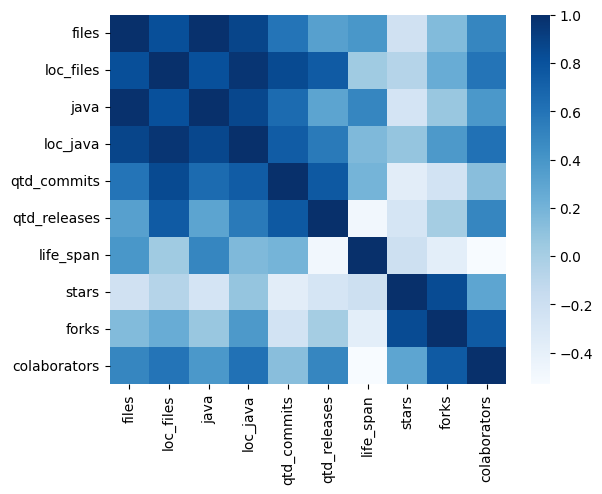

In [80]:
import seaborn as sns

# calculate the correlation matrix on the numeric columns
corr = df_temp3.select_dtypes('number').corr()

sns.heatmap(corr, cmap='Blues')

# 4. Critical files - ATDCodeAnalyzer


## Cassandra

### Faixa de commits

Faixa de commits entre 3.0.0 e 3.11.11 (> 5000 commits analisados)

### Critical classes

In [81]:
lista_arquivos_criticos_cassandra = [("StorageService.java", 3537, 144), ("ColumnFamilyStore.java", 1966, 89), ("DatabaseDescriptor.java", 2092, 87), ("CompactionManager.java", 1279, 74), ("StorageProxy.java", 1667, 53), ("SSTableReader.java", 767, 53), ("Config.java", 553, 52), ("CassandraDaemon.java", 1001, 51), ("SelectStatement.java", 1174, 44), ("SinglePartitionReadCommand.java", 994, 38),("NodeProbe.java", 513, 37), ("MessagingService.java", 574, 36)]
print(f'{len(lista_arquivos_criticos_cassandra)} classes críticas com Cycle Dependency and Hub-like Dependency:')
for each in lista_arquivos_criticos_cassandra:
  print(each)

12 classes críticas com Cycle Dependency and Hub-like Dependency:
('StorageService.java', 3537, 144)
('ColumnFamilyStore.java', 1966, 89)
('DatabaseDescriptor.java', 2092, 87)
('CompactionManager.java', 1279, 74)
('StorageProxy.java', 1667, 53)
('SSTableReader.java', 767, 53)
('Config.java', 553, 52)
('CassandraDaemon.java', 1001, 51)
('SelectStatement.java', 1174, 44)
('SinglePartitionReadCommand.java', 994, 38)
('NodeProbe.java', 513, 37)
('MessagingService.java', 574, 36)


In [82]:
list_cassandra_critial_classes = lista_arquivos_criticos_cassandra

### Plots

![Critial Files Cassandra](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/scatter_plot_cassandra.png "Critical Files Cassandra - Parcial").

![Boxplot AMLOC Cassandra](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/boxplot_amloc_cassandra.png "Boxplot AMLOC Cassandra")

![Boxplot FOC Cassandra](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/boxplot_foc_cassandra.png "Boxplot FOC Cassandra")

![Boxplot CC Cassandra](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/boxplot_cc_cassandra.png "Boxplot CC Cassandra")

## ActiveMQ

### Faixa de commits (1000 commits)

ActiveMQ: primeiro*: ed3c600e09a305c39d78089cc5450d1e4a671f7b,2020-02-20T08:11:34+01:00, ultimo: 8d322df244a6b4d8239f3b24608851eea6cf45ac,2023-08-01T08:29:24-05:00

ActiveMQ: tag do primeiro*: activemq-5.15.0-610-ged3c600e0, tag do ultimo: activemq-5.18.0-84-g8d322df24

### Files frequently changed over time - AMLOC/FOC

In [83]:
df_critial_files_parcial_activemq_amloc_foc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/activemq/activemq_arquivos_criticos.csv')
df_critial_files_parcial_activemq_amloc_foc

,nome,amloc,foc
0,BrokerService.java,292,8
1,DemandForwardingBridgeSupport.java,300,8
2,MessageDatabase.java,170,10
3,Queue.java,72,9
4,TopicSubscription.java,103,9
5,TransportConnector.java,80,10


![Critial Files ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/scatter/activemq_scatter_plot_foc_amloc_only_java_com_quadrantes.png "Critical Files ActiveMQ - Parcial").

![Boxplot AMLOC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_accumulated_modified_locs_boxplot_java_files_valid.png "Boxplot AMLOC ActiveMQ")

![Boxplot FOC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_boxplot_frequencia_commmits_only_java.png "Boxplot FOC ActiveMQ")

![Boxplot CC ActiveMQ](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/activemq/boxplot/activemq_boxplot_complexidade_ciclomatica_only_java.png "Boxplot CC ActiveMQ")

![]()

In [84]:
list_activemq_amloc_foc = df_critial_files_parcial_activemq_amloc_foc.nome.unique().tolist()
print(f'{len(list_activemq_amloc_foc)}: {list_activemq_amloc_foc}')

6: ['BrokerService.java', 'DemandForwardingBridgeSupport.java', 'MessageDatabase.java', 'Queue.java', 'TopicSubscription.java', 'TransportConnector.java']


### Architectural Smells and Design Smells (Cycle Dependency and Hub-like Dependence)

In [85]:
print('AS (Arcan) and DS (DesigniteJava)')

AS (Arcan) and DS (DesigniteJava)


In [86]:
df_as_ds_activemq = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/activemq/analise_designite_classes_criticas.csv')
df_as_ds_activemq

,ProjectName,PackageName,TypeName,CodeSmell
0,java,org.apache.activemq.broker,BrokerService,Cyclic-Dependent Modularization
1,java,org.apache.activemq.broker,BrokerService,Hub-like Modularization
2,java,org.apache.activemq.broker,BrokerServiceAware,Cyclic-Dependent Modularization
3,java,org.apache.activemq.network,DemandForwardingBridgeSupport,Cyclic-Dependent Modularization
4,java,org.apache.activemq.broker.region,DurableTopicSubscription,Cyclic-Dependent Modularization
5,java,org.apache.activemq.memory.buffer,MessageQueue,Cyclic-Dependent Modularization
6,java,org.apache.activemq.broker.region.virtual,MirroredQueue,Cyclic-Dependent Modularization
7,java,org.apache.activemq.broker.region.policy,PendingQueueMessageStoragePolicy,Cyclic-Dependent Modularization
8,java,org.apache.activemq.broker.region,Queue,Cyclic-Dependent Modularization
9,java,org.apache.activemq.broker.region,QueueBrowserSubscription,Cyclic-Dependent Modularization


In [87]:
list_activemq_as_ds_classes = df_as_ds_activemq.TypeName.unique().tolist()
print(f'{len(list_activemq_as_ds_classes)}: {list_activemq_as_ds_classes}')

14: ['BrokerService', 'BrokerServiceAware', 'DemandForwardingBridgeSupport', 'DurableTopicSubscription', 'MessageQueue', 'MirroredQueue', 'PendingQueueMessageStoragePolicy', 'Queue', 'QueueBrowserSubscription', 'QueueDispatchSelector', 'QueueSubscription', 'SubQueueSelectorCacheBroker', 'TopicSubscription', 'TransportConnector']


### ActiveMQ Critical Classes

In [88]:
list_activemq_critial_classes = []
for each in list_activemq_amloc_foc:
  each = each.replace('.java','')
  if each in list_activemq_as_ds_classes:
    list_activemq_critial_classes.append(each)

print(f'{len(list_activemq_critial_classes)}: {list_activemq_critial_classes}')

5: ['BrokerService', 'DemandForwardingBridgeSupport', 'Queue', 'TopicSubscription', 'TransportConnector']


## Guava


### Faixa de commits (1000 commits)

Guava: primeiro*: b224ce81f7c5d4efcf6b1f74ca6cc56cac9aae63,2019-12-18T13:24:46-05:00, ultimo: 41203f03e9b7ddfd776f88660cc467e59bbb180b,2023-08-14T14:56:10-07:00

### Files frequently changed over time - AMLOC/FOC

In [89]:
df_critical_files_guava_amloc_foc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/guava/guava_arquivos_criticos.csv')
df_critical_files_guava_amloc_foc

,nome,amloc,foc
0,AbstractBiMap.java,306,16
1,AbstractExecutionThreadService.java,207,13
2,AbstractFuture.java,1038,55
3,AbstractIdleService.java,117,13
4,AbstractScheduledService.java,650,25
...,...,...,...
85,TypeToken.java,237,20
86,Types.java,133,14
87,Uninterruptibles.java,285,17
88,ValueGraphBuilder.java,130,20


![Scatter plot AMOLC x FOC](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/scatter/guava_scatter_plot_foc_amloc_only_java_com_quadrantes.png "Scatter plot AMOLC x FOC")

![Boxplot AMLOC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_accumulated_modified_locs_boxplot_java_files.png "Boxplot AMLOC Guava")

![Boxplot FOC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_boxplot_frequencia_commmits_only_java.png "Boxplot FOC Guava")

![Boxplot CC Guava](https://raw.githubusercontent.com/armandossrecife/piloto/main/graficos/guava/boxplot/guava_boxplot_complexidade_ciclomatica_only_java.png "Boxplot CC Guava")

In [90]:
list_guava_amloc_foc = df_critical_files_guava_amloc_foc.nome.unique().tolist()
print(f'{len(list_guava_amloc_foc)}: {list_guava_amloc_foc}')

90: ['AbstractBiMap.java', 'AbstractExecutionThreadService.java', 'AbstractFuture.java', 'AbstractIdleService.java', 'AbstractScheduledService.java', 'AggregateFuture.java', 'ArrayTable.java', 'BaseEncoding.java', 'BloomFilter.java', 'ByteStreams.java', 'CacheBuilder.java', 'CacheBuilderSpec.java', 'CacheLoader.java', 'CharStreams.java', 'ClassPath.java', 'ClosingFuture.java', 'CollectionFuture.java', 'CompactHashMap.java', 'ConcurrentHashMultiset.java', 'Converter.java', 'Doubles.java', 'ElementTypesAreNonnullByDefault.java', 'Equivalence.java', 'EvictingQueue.java', 'ExecutionSequencer.java', 'FileBackedOutputStream.java', 'Files.java', 'Floats.java', 'FluentIterable.java', 'Futures.java', 'HashBiMap.java', 'Hashing.java', 'Helpers.java', 'HttpHeaders.java', 'IgnoreJRERequirement.java', 'ImmutableBiMap.java', 'ImmutableCollection.java', 'ImmutableList.java', 'ImmutableListMultimap.java', 'ImmutableMap.java', 'ImmutableMultimap.java', 'ImmutableMultiset.java', 'ImmutableRangeMap.java'

### Architectural Smells and Design Smells (Cycle Dependency and Hub-like Dependence)

In [91]:
df_as_ds_guava = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/piloto/main/criticos/guava/analise_designite_classes_criticas.csv')
df_as_ds_guava

,ProjectName,PackageName,TypeName,CodeSmell
0,guava,com.google.common.util.concurrent,AbstractFuture,Cyclic-Dependent Modularization
1,guava,com.google.common.collect,ArbitraryOrderingHolder,Cyclic-Dependent Modularization
2,guava,com.google.common.io,BaseEncoding,Cyclic-Dependent Modularization
3,guava,com.google.common.cache,CacheBuilder,Cyclic-Dependent Modularization
4,guava,com.google.common.cache,CacheBuilderSpec,Cyclic-Dependent Modularization
...,...,...,...,...
65,guava,com.google.common.collect,TreeRangeSet,Cyclic-Dependent Modularization
66,guava,com.google.common.reflect,TypeToken,Cyclic-Dependent Modularization
67,guava,com.google.common.reflect,Types,Cyclic-Dependent Modularization
68,guava,com.google.common.graph,ValueGraphBuilder,Cyclic-Dependent Modularization


In [92]:
list_guava_as_ds_classes = df_as_ds_guava.TypeName.unique().tolist()
print(f'{len(list_guava_as_ds_classes)}: {list_guava_as_ds_classes}')

68: ['AbstractFuture', 'ArbitraryOrderingHolder', 'BaseEncoding', 'CacheBuilder', 'CacheBuilderSpec', 'ClassPath', 'ClosingFuture', 'Converter', 'ConverterComposition', 'Doubles', 'EmptyImmutableListMultimap', 'EmptyImmutableSetMultimap', 'Equivalence', 'ExecutionSequencer', 'Floats', 'FuturesGetChecked', 'Hashing', 'IdentityConverter', 'ImmutableBiMap', 'ImmutableCollection', 'ImmutableList', 'ImmutableListMultimap', 'ImmutableMap', 'ImmutableMapEntrySet', 'ImmutableMultimap', 'ImmutableMultiset', 'ImmutableRangeMap', 'ImmutableRangeSet', 'ImmutableSet', 'ImmutableSetMultimap', 'ImmutableSortedMap', 'ImmutableSortedSet', 'ImmutableTable', 'InterruptibleTask', 'Ints', 'Iterables', 'Iterators', 'LocalCache', 'LongMath', 'Longs', 'MapMakerInternalMap', 'Maps', 'Multisets', 'NaturalOrdering', 'Ordering', 'Platform', 'Range', 'RangeLexOrdering', 'RangeMap', 'RangeSet', 'RegularImmutableBiMap', 'RegularImmutableMap', 'RegularImmutableMultiset', 'RegularImmutableSet', 'RegularImmutableSorted

### Guava Critical Classes

In [93]:
list_guava_critial_classes = []
for each in list_guava_amloc_foc:
  each = each.replace('.java','')
  if each in list_guava_as_ds_classes:
    list_guava_critial_classes.append(each)

print(f'{len(list_guava_critial_classes)}: {list_guava_critial_classes}')

46: ['AbstractFuture', 'BaseEncoding', 'CacheBuilder', 'CacheBuilderSpec', 'ClassPath', 'ClosingFuture', 'Converter', 'Doubles', 'Equivalence', 'ExecutionSequencer', 'Floats', 'Hashing', 'ImmutableBiMap', 'ImmutableCollection', 'ImmutableList', 'ImmutableListMultimap', 'ImmutableMap', 'ImmutableMultimap', 'ImmutableMultiset', 'ImmutableRangeMap', 'ImmutableRangeSet', 'ImmutableSet', 'ImmutableSetMultimap', 'ImmutableSortedMap', 'ImmutableSortedSet', 'ImmutableTable', 'InterruptibleTask', 'Ints', 'Iterables', 'Iterators', 'LocalCache', 'LongMath', 'Longs', 'MapMakerInternalMap', 'Maps', 'Multisets', 'Ordering', 'Platform', 'Range', 'RegularImmutableMap', 'Sets', 'Synchronized', 'TreeRangeSet', 'TypeToken', 'Types', 'ValueGraphBuilder']


## Jackson

### Files frequently changed over time - AMLOC/FOC

In [94]:
df_critical_files_jackson_amloc_foc = pd.read_csv('https://raw.githubusercontent.com/armandossrecife/teste/main/jackson-databind_arquivos_criticos.csv')
df_critical_files_jackson_amloc_foc


,nome,amloc,foc
0,AnnotationIntrospector.java,406,10
1,AnnotationIntrospectorPair.java,195,10
2,BasicDeserializerFactory.java,323,26
3,BeanDeserializer.java,118,18
4,BeanDeserializerBase.java,123,14
5,ClassUtil.java,215,16
6,DeserializationFeature.java,100,10
7,EnumDeserializer.java,236,12
8,EnumResolver.java,905,23
9,EnumValues.java,195,11


In [95]:
list_jackson_amloc_foc = df_critical_files_jackson_amloc_foc.nome.unique().tolist()
print(f'{len(list_jackson_amloc_foc)}: {list_jackson_amloc_foc}')

21: ['AnnotationIntrospector.java', 'AnnotationIntrospectorPair.java', 'BasicDeserializerFactory.java', 'BeanDeserializer.java', 'BeanDeserializerBase.java', 'ClassUtil.java', 'DeserializationFeature.java', 'EnumDeserializer.java', 'EnumResolver.java', 'EnumValues.java', 'FactoryBasedEnumDeserializer.java', 'JacksonAnnotationIntrospector.java', 'JsonNode.java', 'MapperFeature.java', 'NumberDeserializers.java', 'ObjectMapper.java', 'ObjectNode.java', 'POJOPropertiesCollector.java', 'StdDeserializer.java', 'StdTypeResolverBuilder.java', 'TokenBuffer.java']


### Architectural Smells and Design Smells (Cycle Dependency and Hub-like Dependence)

In [96]:
!wget https://github.com/armandossrecife/piloto/raw/main/designite/ds_commit_tag_jd_2_11_0.zip

--2023-09-04 20:34:45--  https://github.com/armandossrecife/piloto/raw/main/designite/ds_commit_tag_jd_2_11_0.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/armandossrecife/piloto/main/designite/ds_commit_tag_jd_2_11_0.zip [following]
--2023-09-04 20:34:45--  https://raw.githubusercontent.com/armandossrecife/piloto/main/designite/ds_commit_tag_jd_2_11_0.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84484 (83K) [application/zip]
Saving to: ‘ds_commit_tag_jd_2_11_0.zip’

ds_commit_tag_jd_2_ 100%[===================>]  82.50K  --.-KB/s    in 0.05s   

2023-09-04 20:34:46 (1.73 MB/s) - 

In [97]:
!unzip ds_commit_tag_jd_2_11_0.zip

Archive:  ds_commit_tag_jd_2_11_0.zip
  inflating: analise_designite_classes_criticas.csv  
  inflating: analise_designite.csv   
  inflating: designCodeSmells.csv    
  inflating: implementationCodeSmells.csv  
  inflating: methodMetrics.csv       
  inflating: typeMetrics.csv         


In [98]:
df_as_ds_jackson = pd.read_csv('analise_designite_classes_criticas.csv')
df_as_ds_jackson

,ProjectName,PackageName,TypeName,CodeSmell
0,java,com.fasterxml.jackson.databind,AnnotationIntrospector,Cyclic-Dependent Modularization
1,java,com.fasterxml.jackson.databind.introspect,AnnotationIntrospectorPair,Cyclic-Dependent Modularization
2,java,com.fasterxml.jackson.databind.node,BaseJsonNode,Cyclic-Dependent Modularization
3,java,com.fasterxml.jackson.databind.deser,BeanDeserializerBuilder,Cyclic-Dependent Modularization
4,java,com.fasterxml.jackson.databind.deser,BeanDeserializerFactory,Cyclic-Dependent Modularization
5,java,com.fasterxml.jackson.databind.deser,BeanDeserializerModifier,Cyclic-Dependent Modularization
6,java,com.fasterxml.jackson.databind.util,ClassUtil,Cyclic-Dependent Modularization
7,java,com.fasterxml.jackson.databind.util,EnumValues,Cyclic-Dependent Modularization
8,java,com.fasterxml.jackson.databind,JsonNode,Cyclic-Dependent Modularization
9,java,com.fasterxml.jackson.databind.node,JsonNodeFactory,Cyclic-Dependent Modularization


In [99]:
list_jackson_as_ds_classes = df_as_ds_jackson.TypeName.unique().tolist()
print(f'{len(list_jackson_as_ds_classes)}: {list_jackson_as_ds_classes}')

13: ['AnnotationIntrospector', 'AnnotationIntrospectorPair', 'BaseJsonNode', 'BeanDeserializerBuilder', 'BeanDeserializerFactory', 'BeanDeserializerModifier', 'ClassUtil', 'EnumValues', 'JsonNode', 'JsonNodeFactory', 'ObjectMapper', 'ObjectNode', 'TokenBuffer']


In [100]:
list_jackson_critial_classes = []
for each in list_jackson_amloc_foc:
  each = each.replace('.java','')
  if each in list_jackson_as_ds_classes:
    list_jackson_critial_classes.append(each)

print(f'{len(list_jackson_critial_classes)}: {list_jackson_critial_classes}')

8: ['AnnotationIntrospector', 'AnnotationIntrospectorPair', 'ClassUtil', 'EnumValues', 'JsonNode', 'ObjectMapper', 'ObjectNode', 'TokenBuffer']


# 5. Comparing with Classes affected by AD from SAS2022

Comparações

c1)
Os arquivos críticos Cassandra encontrados pelo ADTCodeAnalyzer aparecem nos arquivos que possem AS do trabalho de SAS2022?

c2)
Os arquivos críticos ActiveMQ encontrados pelo ADTCodeAnalyzer aparecem nos arquivos que possem AS do trabalho de SAS2022?

c3)
Os arquivos críticos Guava encontrados pelo ADTCodeAnalyzer aparecem nos arquivos que possem AS do trabalho de SAS2022?

c4)
Os arquivos críticos Jackson-databind encontrados pelo ADTCodeAnalyzer aparecem nos arquivos que possem AS do trabalho de SAS2022?

Dados importantes do SAS2022

* df_smells
* df_smells_classes_affected
* df_cassandra_smells_classes_affected
* df_activemq_smells_classes_affected
* df_guava_smells_classes_affected
* df_jackson_smells_classes_affected

Dados dos componentes

* df_components
* df_cassandra_classes
* df_activemq_classes
* df_guava_classes
* df_jackson_classes

Artefatos afetados por AS

* df_cassandra_classes_affected_by_as
* df_activemq_classes_affected_by_as
* df_guava_classes_affected_by_as
* df_jackson_classes_affected_by_as

In [101]:
def pesquisa_por_nome(my_df, nome):
  resultado = my_df['affectedElements'].str.contains(nome)
  return resultado

def aparece_sas_2022(my_df, nome):
  resultado = my_df['affectedElements'].str.contains(nome)
  contagem = my_df[resultado]
  if len(contagem) > 0:
    return True
  else:
    return False

## 5.1 Cassandra

### Classes do Cassandra afetadas por AS

In [102]:
colunas_smells = ['project', 'age', 'firstAppeared', 'lastDetected', 'smellType', 'affectedElements']
df_cassandra_smells_classes_affected[colunas_smells]

,project,age,firstAppeared,lastDetected,smellType,affectedElements
50351,cassandra,2,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,cyclicDep,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50352,cassandra,2,1-cf56f8f3acbeac0ddff9ee3131ad7abe2a919ba3,2-50c1987265f8ddaf5032a7ace07b2462aba4f09b,cyclicDep,"[org.apache.cassandra.db.ColumnFamily, org.apa..."
50359,cassandra,4,112-569c6abcfa50901fdf73d0b6e89cc1562e698c43,115-4de7a65ed9f3c97658a80dd64032ad6e82e9d58b,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
50360,cassandra,4,112-569c6abcfa50901fdf73d0b6e89cc1562e698c43,115-4de7a65ed9f3c97658a80dd64032ad6e82e9d58b,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
50361,cassandra,4,112-569c6abcfa50901fdf73d0b6e89cc1562e698c43,115-4de7a65ed9f3c97658a80dd64032ad6e82e9d58b,cyclicDep,"[org.apache.cassandra.db.Keyspace, org.apache...."
...,...,...,...,...,...,...
91854,cassandra,2,65-db6b563f143dc5f2037244854527cafc8594e730,66-2bb30af662069aa35ea8e2dd1be4890cd70bf330,cyclicDep,"[org.apache.cassandra.config.CFMetaData, org.a..."
91855,cassandra,2,65-db6b563f143dc5f2037244854527cafc8594e730,66-2bb30af662069aa35ea8e2dd1be4890cd70bf330,cyclicDep,"[org.apache.cassandra.config.CFMetaData, org.a..."
91893,cassandra,3,116-1b82de8c9fe62cf78f07cf54fe32b561058eebe5,118-4af23348ecd6fc8dbef44ac5ebdb6ae60d599283,cyclicDep,"[org.apache.cassandra.db.Mutation, org.apache...."
91894,cassandra,3,116-1b82de8c9fe62cf78f07cf54fe32b561058eebe5,118-4af23348ecd6fc8dbef44ac5ebdb6ae60d599283,cyclicDep,"[org.apache.cassandra.db.Mutation, org.apache...."


### Compare Hit Rate

In [126]:
print('Cassandra  Critical files by ATDCodeAnalyzer: ')
print(len(list_cassandra_critial_classes))
for each in list_cassandra_critial_classes:
  nome = each[0].replace('.java', '')
  print(nome)

Cassandra  Critical files by ATDCodeAnalyzer: 
12
StorageService
ColumnFamilyStore
DatabaseDescriptor
CompactionManager
StorageProxy
SSTableReader
Config
CassandraDaemon
SelectStatement
SinglePartitionReadCommand
NodeProbe
MessagingService


In [122]:
print('Cassandra Critical files by SAS2022')
lista_arquivos_criticos_cassandra_sas_2022 = []
for each in list_cassandra_critial_classes:
  each = each[0].replace('.java', '')
  if aparece_sas_2022(my_df=df_cassandra_smells_classes_affected, nome=each):
    lista_arquivos_criticos_cassandra_sas_2022.append(each)
    print(each)

print(len(lista_arquivos_criticos_cassandra_sas_2022))

Cassandra Critical files by SAS2022
StorageService
ColumnFamilyStore
DatabaseDescriptor
CompactionManager
StorageProxy
SSTableReader
Config
CassandraDaemon
SelectStatement
SinglePartitionReadCommand
MessagingService
11



### Cassandra Hit Rate

In [104]:
qtd_classes_criticas_my_method = len(list_cassandra_critial_classes)
qtd_classes_criticas_sas_2022 = len(lista_arquivos_criticos_cassandra_sas_2022)
print(f'Das {qtd_classes_criticas_my_method} classes críticas identificadas por ATDCodeAnalizer, {qtd_classes_criticas_sas_2022} aparecem no SAS2022 ')
print(f'Taxa de acerto para o Cassandra: {round(qtd_classes_criticas_sas_2022/qtd_classes_criticas_my_method, 2)}')

Das 12 classes críticas identificadas por ATDCodeAnalizer, 11 aparecem no SAS2022 
Taxa de acerto para o Cassandra: 0.92


## 5.2 ActiveMQ

### Classes do ActiveMQ afetadas por AS

In [105]:
colunas_smells = ['project', 'age', 'firstAppeared', 'lastDetected', 'smellType', 'affectedElements']
df_activemq_smells_classes_affected[colunas_smells]

,project,age,firstAppeared,lastDetected,smellType,affectedElements
8088,activemq,11,1-80d129918854d1409869683d284797233c10d9cd,11-78035ea26b5e56f422f7473c2690b3965aff4bbc,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
8089,activemq,11,1-80d129918854d1409869683d284797233c10d9cd,11-78035ea26b5e56f422f7473c2690b3965aff4bbc,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
8090,activemq,11,1-80d129918854d1409869683d284797233c10d9cd,11-78035ea26b5e56f422f7473c2690b3965aff4bbc,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
8091,activemq,11,1-80d129918854d1409869683d284797233c10d9cd,11-78035ea26b5e56f422f7473c2690b3965aff4bbc,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
8092,activemq,11,1-80d129918854d1409869683d284797233c10d9cd,11-78035ea26b5e56f422f7473c2690b3965aff4bbc,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
...,...,...,...,...,...,...
33702,activemq,42,88-6c8e89652ffbb1973d452cb3e2b464d4dbf6e803,129-09d7599bd1b573b7bcb77df1f4ce65fe6d7754d3,cyclicDep,"[org.apache.activemq.ActiveMQConnection, org.a..."
33734,activemq,3,110-ec049a0882172b2ed288036f36876a8925b8c1bd,112-ad770ea79d9eaf9e40216ed2e116b2544fcd8e3e,cyclicDep,"[org.apache.activemq.broker.BrokerService, org..."
33735,activemq,3,110-ec049a0882172b2ed288036f36876a8925b8c1bd,112-ad770ea79d9eaf9e40216ed2e116b2544fcd8e3e,cyclicDep,"[org.apache.activemq.broker.BrokerService, org..."
33736,activemq,3,110-ec049a0882172b2ed288036f36876a8925b8c1bd,112-ad770ea79d9eaf9e40216ed2e116b2544fcd8e3e,cyclicDep,"[org.apache.activemq.broker.BrokerService, org..."


### Compare Hit Rate

In [130]:
print('ActiveMQ Critical Files by ATDCodeAnalyzer: ')
lista_arquivos_criticos_activemq = []
for each in list_activemq_critial_classes:
  each = each.replace('.java', '')
  lista_arquivos_criticos_activemq.append(each)

lista_arquivos_criticos_activemq

ActiveMQ Critical Files by ATDCodeAnalyzer: 


['BrokerService',
 'DemandForwardingBridgeSupport',
 'Queue',
 'TopicSubscription',
 'TransportConnector']

### ActiveMQ Hit Rate

In [107]:
lista_arquivos_criticos_activemq_sas_2022 = []
for each in lista_arquivos_criticos_activemq:
  if aparece_sas_2022(my_df=df_activemq_smells_classes_affected, nome=each):
    lista_arquivos_criticos_activemq_sas_2022.append(each)
    print(each)

BrokerService
Queue
TransportConnector


In [108]:
qtd_classes_criticas_my_method_activemq = len(lista_arquivos_criticos_activemq)
qtd_classes_criticas_sas_2022_activemq = len(lista_arquivos_criticos_activemq_sas_2022)
print(f'Das {qtd_classes_criticas_my_method_activemq} classes críticas identificadas por ATDCodeAnalizer, {qtd_classes_criticas_sas_2022_activemq} aparecem no SAS2022 ')
print(f'Taxa de acerto para o ActiveMQ: {round(qtd_classes_criticas_sas_2022_activemq/qtd_classes_criticas_my_method_activemq, 2)}')

Das 5 classes críticas identificadas por ATDCodeAnalizer, 3 aparecem no SAS2022 
Taxa de acerto para o ActiveMQ: 0.6


##5.3 Guava

### Classes do Guava afetadas por AS

In [109]:
df_guava_smells_classes_affected[colunas_smells]

,project,age,firstAppeared,lastDetected,smellType,affectedElements
100576,guava,30,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,31-59e0fa707b40686406ea2c9812785391beb13367,cyclicDep,"[com.google.common.base.CharMatcher, com.googl..."
100577,guava,30,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,31-59e0fa707b40686406ea2c9812785391beb13367,cyclicDep,"[com.google.common.base.CharMatcher, com.googl..."
100578,guava,30,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,31-59e0fa707b40686406ea2c9812785391beb13367,cyclicDep,"[com.google.common.base.CharMatcher, com.googl..."
100579,guava,30,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,31-59e0fa707b40686406ea2c9812785391beb13367,cyclicDep,"[com.google.common.base.CharMatcher, com.googl..."
100580,guava,30,2-a194b64f31a7453a9be7e4573b2d92afab3aa37e,31-59e0fa707b40686406ea2c9812785391beb13367,cyclicDep,"[com.google.common.base.CharMatcher, com.googl..."
...,...,...,...,...,...,...
105088,guava,9,81-6c63cf3c8a9d94821e2b24a96fb4c3564377051f,100-0e6b381b484774adb0466106dade91341fda11b9,cyclicDep,"[com.google.common.collect.ImmutableTable, com..."
105089,guava,9,81-6c63cf3c8a9d94821e2b24a96fb4c3564377051f,100-0e6b381b484774adb0466106dade91341fda11b9,cyclicDep,"[com.google.common.collect.ImmutableTable, com..."
105090,guava,9,81-6c63cf3c8a9d94821e2b24a96fb4c3564377051f,100-0e6b381b484774adb0466106dade91341fda11b9,cyclicDep,"[com.google.common.collect.ImmutableTable, com..."
105091,guava,9,81-6c63cf3c8a9d94821e2b24a96fb4c3564377051f,100-0e6b381b484774adb0466106dade91341fda11b9,cyclicDep,"[com.google.common.collect.ImmutableTable, com..."


### Compare Hit Rate

In [110]:
lista_arquivos_criticos_guava = []
for each in list_guava_critial_classes:
  each = each.replace('.java', '')
  lista_arquivos_criticos_guava.append(each)

print(f'Qtd: {len(lista_arquivos_criticos_guava)}, {lista_arquivos_criticos_guava}')

Qtd: 46, ['AbstractFuture', 'BaseEncoding', 'CacheBuilder', 'CacheBuilderSpec', 'ClassPath', 'ClosingFuture', 'Converter', 'Doubles', 'Equivalence', 'ExecutionSequencer', 'Floats', 'Hashing', 'ImmutableBiMap', 'ImmutableCollection', 'ImmutableList', 'ImmutableListMultimap', 'ImmutableMap', 'ImmutableMultimap', 'ImmutableMultiset', 'ImmutableRangeMap', 'ImmutableRangeSet', 'ImmutableSet', 'ImmutableSetMultimap', 'ImmutableSortedMap', 'ImmutableSortedSet', 'ImmutableTable', 'InterruptibleTask', 'Ints', 'Iterables', 'Iterators', 'LocalCache', 'LongMath', 'Longs', 'MapMakerInternalMap', 'Maps', 'Multisets', 'Ordering', 'Platform', 'Range', 'RegularImmutableMap', 'Sets', 'Synchronized', 'TreeRangeSet', 'TypeToken', 'Types', 'ValueGraphBuilder']


### Guava Hit Rate

In [111]:
lista_arquivos_criticos_guava_sas_2022 = []
for each in lista_arquivos_criticos_guava:
  if aparece_sas_2022(my_df=df_guava_smells_classes_affected, nome=each):
    lista_arquivos_criticos_guava_sas_2022.append(each)

print(f'{len(lista_arquivos_criticos_guava_sas_2022)}: {lista_arquivos_criticos_guava_sas_2022}')

27: ['BaseEncoding', 'CacheBuilder', 'CacheBuilderSpec', 'ClassPath', 'ImmutableBiMap', 'ImmutableList', 'ImmutableListMultimap', 'ImmutableMap', 'ImmutableMultimap', 'ImmutableMultiset', 'ImmutableRangeMap', 'ImmutableRangeSet', 'ImmutableSet', 'ImmutableSetMultimap', 'ImmutableSortedMap', 'ImmutableSortedSet', 'ImmutableTable', 'LocalCache', 'MapMakerInternalMap', 'Maps', 'Ordering', 'Platform', 'Range', 'RegularImmutableMap', 'Sets', 'TreeRangeSet', 'TypeToken']


In [112]:
qtd_classes_criticas_my_method_guava = len(lista_arquivos_criticos_guava)
qtd_classes_criticas_sas_2022_guava = len(lista_arquivos_criticos_guava_sas_2022)
print(f'Das {qtd_classes_criticas_my_method_guava} classes críticas identificadas por ATDCodeAnalizer, {qtd_classes_criticas_sas_2022_guava} aparecem no SAS2022 ')
print(f'Taxa de acerto para o ActiveMQ: {round(qtd_classes_criticas_sas_2022_guava/qtd_classes_criticas_my_method_guava, 2)}')

Das 46 classes críticas identificadas por ATDCodeAnalizer, 27 aparecem no SAS2022 
Taxa de acerto para o ActiveMQ: 0.59


##5.4 Jackson-databind


### Classes do jackson-databind afetadas por AS

In [113]:
df_jackson_smells_classes_affected[colunas_smells]

,project,age,firstAppeared,lastDetected,smellType,affectedElements
133383,jackson-databind,46,1-ba0470fba09489f0fd97f2718e064b5105cafad7,47-3699c3d30e4ff6cabff50b737e0069de88f67f84,cyclicDep,[com.fasterxml.jackson.databind.type.ArrayType...
133384,jackson-databind,46,1-ba0470fba09489f0fd97f2718e064b5105cafad7,47-3699c3d30e4ff6cabff50b737e0069de88f67f84,cyclicDep,[com.fasterxml.jackson.databind.type.ArrayType...
133385,jackson-databind,46,1-ba0470fba09489f0fd97f2718e064b5105cafad7,47-3699c3d30e4ff6cabff50b737e0069de88f67f84,cyclicDep,[com.fasterxml.jackson.databind.type.ArrayType...
133386,jackson-databind,46,1-ba0470fba09489f0fd97f2718e064b5105cafad7,47-3699c3d30e4ff6cabff50b737e0069de88f67f84,cyclicDep,[com.fasterxml.jackson.databind.type.ArrayType...
133387,jackson-databind,46,1-ba0470fba09489f0fd97f2718e064b5105cafad7,47-3699c3d30e4ff6cabff50b737e0069de88f67f84,cyclicDep,[com.fasterxml.jackson.databind.type.ArrayType...
...,...,...,...,...,...,...
136846,jackson-databind,2,93-7b5542b9ffbe8247e5cedafd2adf4d79eb897751,94-8ecd339e6d039c0042d3810587764578b7fa81a6,cyclicDep,[com.fasterxml.jackson.databind.json.JsonMappe...
137060,jackson-databind,4,75-134aa746c896e167d3a156066a2e10263f458d2f,78-fad72e265ebbcd838135c36f05d63595b208fd9e,cyclicDep,[com.fasterxml.jackson.databind.ser.impl.BeanA...
137061,jackson-databind,4,75-134aa746c896e167d3a156066a2e10263f458d2f,78-fad72e265ebbcd838135c36f05d63595b208fd9e,cyclicDep,[com.fasterxml.jackson.databind.ser.impl.BeanA...
137062,jackson-databind,4,75-134aa746c896e167d3a156066a2e10263f458d2f,78-fad72e265ebbcd838135c36f05d63595b208fd9e,cyclicDep,[com.fasterxml.jackson.databind.ser.impl.BeanA...


### Compare Hit Rate

In [114]:
lista_arquivos_criticos_jackson = []
for each in list_jackson_critial_classes:
  each = each.replace('.java', '')
  lista_arquivos_criticos_jackson.append(each)

print(f'Qtd: {len(lista_arquivos_criticos_jackson)}, {lista_arquivos_criticos_jackson}')

Qtd: 8, ['AnnotationIntrospector', 'AnnotationIntrospectorPair', 'ClassUtil', 'EnumValues', 'JsonNode', 'ObjectMapper', 'ObjectNode', 'TokenBuffer']


### Jackson Hit Rate

In [115]:
lista_arquivos_criticos_jackson_sas_2022 = []
for each in lista_arquivos_criticos_jackson:
  if aparece_sas_2022(my_df=df_jackson_smells_classes_affected, nome=each):
    lista_arquivos_criticos_jackson_sas_2022.append(each)

print(f'{len(lista_arquivos_criticos_jackson_sas_2022)}: {lista_arquivos_criticos_jackson_sas_2022}')


4: ['AnnotationIntrospector', 'JsonNode', 'ObjectMapper', 'ObjectNode']


In [116]:
qtd_classes_criticas_my_method_jackson = len(lista_arquivos_criticos_jackson)
qtd_classes_criticas_sas_2022_jackson = len(lista_arquivos_criticos_jackson_sas_2022)
print(f'Das {qtd_classes_criticas_my_method_jackson} classes críticas identificadas por ATDCodeAnalizer, {qtd_classes_criticas_sas_2022_jackson} aparecem no SAS2022 ')
print(f'Taxa de acerto para o Jackson-databind: {round(qtd_classes_criticas_sas_2022_jackson/qtd_classes_criticas_my_method_jackson, 2)}')

Das 8 classes críticas identificadas por ATDCodeAnalizer, 4 aparecem no SAS2022 
Taxa de acerto para o Jackson-databind: 0.5
